In [1]:
!git clone https://github.com/jalpv1//wiki-art-selected-resized-downsampled
!rm -rf .//wiki-art-selected-resized-downsampled/.git
model_name ="resnet18_1"
cv = 5

fatal: destination path 'wiki-art-selected-resized-downsampled' already exists and is not an empty directory.


In [1]:
model_name ="resnet_1"
cv = 5

In [3]:
!pip install scikit-image


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 109.3 MB/s eta 0:00:0000:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 63.8 MB/s eta 0:00:00


In [1]:
!pip install torchsampler
!pip install xgboost
!pip install torchmetrics
!pip install pytorch_lightning
!pip install optuna
!pip install memory_profiler
!pip install scikit-learn
!pip install matplotlib
! pip install imageio
!pip install opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 8.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 18.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 150.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 109.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 13.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 25.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
from torch.utils.data import WeightedRandomSampler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
import time
import os
import copy
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
from torchvision.datasets import ImageFolder
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
import imageio as io
from PIL import Image
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

import torchmetrics
import pytorch_lightning as pl

import data_loader as dl
import experiments as e


!python --version
!nvcc --version
!pip install nvcc4jupyter
%load_ext nvcc4jupyter
class_names = ['Abstract_Expressionism','Baroque','Cubism', 'Fauvism', 'Impressionism','Minimalism','Naive_Art_Primitivism','Pointillism','Rococo','Ukiyo_e']

num_classes = 10


Python 3.11.6
/usr/bin/sh: line 1: nvcc: command not found
Source files will be saved in "/tmp/tmpbp581wx3".


In [3]:
class ArtStyleDataset(Dataset):
  def __init__(self, root_dir, transform = None, transform_tensor = None):
     self.imgs = ImageFolder(root_dir)
     self.root_dir = root_dir
     self.transform = transform
     self.transform_tensor = transform_tensor


  def __len__(self):
        return len(self.imgs)

  def __getitem__(self, idx):
        sample, label = self.imgs[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample, label
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
data = ArtStyleDataset('wiki-art-selected-resized-downsampled', transform)


In [4]:
model_name ="resnet_1"

class Model (torch.nn.Module):
  def __init__(self, layer_name: str = 'layer1'):
     super(Model, self).__init__()
     self.model = models.resnet18(pretrained=True)
     self.layer_name = layer_name

     self.activations = dict()

     def hook(module, input, output):
        self.activations[layer_name] = output

     self.model.get_submodule(layer_name).register_forward_hook(hook)

  def forward(self, x):
        _ = self.model(x)
        return self.activations[self.layer_name]

In [5]:
device = "cuda"

In [6]:
model = Model().to(device)
dataset = dl.data_load(data)
train_data , train_labels,map_img_feature = dl.extract_features(model, dataset)
dl.save_pickle(train_data,train_labels, model_name)

/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


(64,)
(163,)
----------------------------------
(64,)


/opt/conda/lib/python3.11/site-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


(163,)
----------------------------------
(64,)
(163,)
----------------------------------
(64,)
(163,)
----------------------------------
(64,)
(163,)
----------------------------------
(64,)
(163,)
----------------------------------
(64,)
(163,)
----------------------------------
(64,)
(163,)
----------------------------------
(64,)
(163,)
----------------------------------
(64,)
(163,)
----------------------------------
(64,)
(163,)
----------------------------------
(64,)
(163,)
----------------------------------
(64,)
(163,)
----------------------------------
(64,)
(163,)
----------------------------------
(64,)
(163,)
----------------------------------
(64,)
(163,)
----------------------------------
(64,)
(163,)
----------------------------------
(64,)
(163,)
----------------------------------
(64,)
(163,)
----------------------------------
(64,)
(163,)
----------------------------------
(64,)
(163,)
----------------------------------
(64,)
(163,)
---------------------------------

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

train_labels = np.array(train_labels)
train_labels = train_labels.ravel()


print(f"Train: {len(X_train)}, Test: {len(X_test)}")
#dl.save_pickle(train_data,train_labels, model_name)


Train: 14804, Test: 3701


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

with open('traindata_resnet18_1.pickle', 'rb') as handle:
    train_data = pickle.load(handle)
with open('train_labels_resnet18_1.pickle', 'rb') as handle:
    train_labels = pickle.load(handle)

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

train_labels = np.array(train_labels)
train_labels = train_labels.ravel()


print(f"Train: {len(X_train)}, Test: {len(X_test)}")

Train: 14804, Test: 3701


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  ConfusionMatrixDisplay
from xgboost import XGBRFClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    classification_report, roc_curve, auc, precision_recall_curve, confusion_matrix
)
import xgboost


models = {
    "Random Forest": RandomForestClassifier(n_estimators = 500, random_state=42),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    "KNN":KNeighborsClassifier(n_neighbors=30, metric='cosine'),
    "MLP": MLPClassifier(
    hidden_layer_sizes=(300, 150, 75),
                    max_iter=500,
                    solver='adam',
                    learning_rate="adaptive",
                    learning_rate_init=0.001,
                    early_stopping=True,
                    random_state=42),
    "XgBoost":  XGBRFClassifier(n_estimators=500, max_depth=20, random_state=42)
}

for name in models.keys():
  print(f"Model: {name}")
  avg = e.kfold_crossvalidation(train_data, train_labels, 5,  models[name], 1)
  print(avg)





Model: Random Forest
       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.831325  0.829776  0.828857  0.829776   77.371835   
1         2   0.832738  0.830046  0.829382  0.830046   77.443255   
2         3   0.829105  0.827074  0.826306  0.827074   79.116042   
3         4   0.817438  0.815455  0.814592  0.815455   77.755852   
4         5   0.818967  0.817887  0.816697  0.817887   78.071455   
5   Average   0.825915  0.824048  0.823167  0.824048   77.951688   
6  1.581139   0.007179  0.006887  0.007005  0.006887    0.707663   

   Prediction time  
0         0.441650  
1         0.419155  
2         0.571460  
3         0.387282  
4         0.518000  
5         0.467510  
6         0.075495  
Model: SVM
       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.676904  0.675493  0.672781  0.675493    9.747937   
1         2   0.666303  0.667387  0.663596  0.667387    9.887490   
2         3   0.656310  0.655769  0.653454  0.65576

In [9]:
model_name ="resnet_2"

class Model (torch.nn.Module):
  def __init__(self, layer_name: str = 'layer2'):
     super(Model, self).__init__()
     self.model = models.resnet18(pretrained=True)
     self.layer_name = layer_name

     self.activations = dict()

     def hook(module, input, output):
        self.activations[layer_name] = output

     self.model.get_submodule(layer_name).register_forward_hook(hook)

  def forward(self, x):
        _ = self.model(x)
        return self.activations[self.layer_name]

In [12]:
model = Model().to(device)
dataset = dl.data_load(data)
train_data , train_labels,map_img_feature = dl.extract_features(model, dataset)
dl.save_pickle(train_data,train_labels, model_name)

/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)


/opt/conda/lib/python3.11/site-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
-------------

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  ConfusionMatrixDisplay
from xgboost import XGBRFClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    classification_report, roc_curve, auc, precision_recall_curve, confusion_matrix
)
import xgboost


models = {
    "Random Forest": RandomForestClassifier(n_estimators = 500, random_state=42),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    "KNN":KNeighborsClassifier(n_neighbors=30, metric='cosine'),
    "MLP": MLPClassifier(
    hidden_layer_sizes=(300, 150, 75),
                    max_iter=500,
                    solver='adam',
                    learning_rate="adaptive",
                    learning_rate_init=0.001,
                    early_stopping=True,
                    random_state=42),
    "XgBoost":  XGBRFClassifier(n_estimators=500, max_depth=20, random_state=42)
}

for name in models.keys():
  print(f"Model: {name}")
  avg = e.kfold_crossvalidation(train_data, train_labels, 5,  models[name], 1)
  print(avg)





Model: Random Forest


/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.851392  0.848149  0.847674  0.848149   94.676002   
1         2   0.840123  0.836260  0.835052  0.836260   94.462089   
2         3   0.838018  0.833018  0.831182  0.833018   94.858061   
3         4   0.857431  0.854093  0.853541  0.854093   95.438559   
4         5   0.850276  0.848419  0.847755  0.848419   94.949667   
5   Average   0.847448  0.843988  0.843041  0.843988   94.876876   
6  1.581139   0.008152  0.008932  0.009466  0.008932    0.365219   

   Prediction time  
0         0.323741  
1         0.341025  
2         0.316187  
3         0.386294  
4         0.707139  
5         0.414877  
6         0.165630  
Model: SVM


/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.779374  0.778438  0.777128  0.778438   10.728920   
1         2   0.773303  0.771954  0.769456  0.771954   11.075773   
2         3   0.774332  0.772764  0.769688  0.772764   10.940185   
3         4   0.783049  0.781681  0.780528  0.781681   11.084262   
4         5   0.787128  0.787085  0.786032  0.787085   11.343920   
5   Average   0.779437  0.778384  0.776566  0.778384   11.034612   
6  1.581139   0.005828  0.006315  0.007132  0.006315    0.224831   

   Prediction time  
0         5.955473  
1         6.092930  
2         6.064096  
3         6.797794  
4         6.016131  
5         6.185285  
6         0.346342  
Model: KNN


/opt/conda/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.625462  0.605512  0.597073  0.605512    0.009905   
1         2   0.638494  0.620373  0.611082  0.620373    0.010651   
2         3   0.632598  0.618752  0.608013  0.618752    0.013397   
3         4   0.634064  0.619292  0.609632  0.619292    0.014818   
4         5   0.629280  0.617941  0.607817  0.617941    0.014625   
5   Average   0.631979  0.616374  0.606724  0.616374    0.012679   
6  1.581139   0.004923  0.006136  0.005555  0.006136    0.002274   

   Prediction time  
0         1.000621  
1         1.131645  
2         1.048424  
3         1.044691  
4         1.071730  
5         1.059422  
6         0.047862  
Model: MLP


/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed w

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.805014  0.804918  0.804534  0.804918   13.837698   
1         2   0.793726  0.794110  0.793638  0.794110   13.189441   
2         3   0.787296  0.787085  0.786210  0.787085   10.816668   
3         4   0.797297  0.797082  0.796900  0.797082   10.681357   
4         5   0.802815  0.802216  0.802260  0.802216   13.744394   
5   Average   0.797230  0.797082  0.796709  0.797082   12.453911   
6  1.581139   0.007120  0.007010  0.007276  0.007010    1.576684   

   Prediction time  
0         0.008735  
1         0.009607  
2         0.009517  
3         0.009324  
4         0.013186  
5         0.010074  
6         0.001773  
Model: XgBoost
       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.839678  0.839233  0.838642  0.839233  277.326748   
1         2   0.828956  0.827344  0.826413  0.827344  257.652043   
2         3   0.826416  0.825182  0.823482  0.825182  248.877264   


In [15]:
model_name ="resnet_3"

class Model (torch.nn.Module):
  def __init__(self, layer_name: str = 'layer3'):
     super(Model, self).__init__()
     self.model = models.resnet18(pretrained=True)
     self.layer_name = layer_name

     self.activations = dict()

     def hook(module, input, output):
        self.activations[layer_name] = output

     self.model.get_submodule(layer_name).register_forward_hook(hook)

  def forward(self, x):
        _ = self.model(x)
        return self.activations[self.layer_name]

In [16]:
model = Model().to(device)
dataset = dl.data_load(data)
train_data , train_labels,map_img_feature = dl.extract_features(model, dataset)
dl.save_pickle(train_data,train_labels, model_name)

/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)


/opt/conda/lib/python3.11/site-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
-------------

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  ConfusionMatrixDisplay
from xgboost import XGBRFClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    classification_report, roc_curve, auc, precision_recall_curve, confusion_matrix
)
import xgboost


models = {
    "Random Forest": RandomForestClassifier(n_estimators = 500, random_state=42),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    "KNN":KNeighborsClassifier(n_neighbors=30, metric='cosine'),
    "MLP": MLPClassifier(
    hidden_layer_sizes=(300, 150, 75),
                    max_iter=500,
                    solver='adam',
                    learning_rate="adaptive",
                    learning_rate_init=0.001,
                    early_stopping=True,
                    random_state=42),
    "XgBoost":  XGBRFClassifier(n_estimators=500, max_depth=20, random_state=42)
}

for name in models.keys():
  print(f"Model: {name}")
  avg = e.kfold_crossvalidation(train_data, train_labels, 5,  models[name], 1)
  print(avg)





Model: Random Forest


/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.831581  0.824912  0.824332  0.824912  114.891939   
1         2   0.822239  0.815455  0.814903  0.815455  113.990885   
2         3   0.832509  0.827614  0.826620  0.827614  113.858264   
3         4   0.816247  0.811132  0.809892  0.811132  114.225710   
4         5   0.814082  0.808700  0.807873  0.808700  113.832758   
5   Average   0.823332  0.817563  0.816724  0.817563  114.159911   
6  1.581139   0.008503  0.008357  0.008428  0.008357    0.437831   

   Prediction time  
0         0.433274  
1         0.400079  
2         0.501934  
3         0.490660  
4         0.446640  
5         0.454517  
6         0.041927  
Model: SVM


/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.796755  0.795461  0.794539  0.795461   18.824408   
1         2   0.808615  0.806269  0.804732  0.806269   19.353009   
2         3   0.804645  0.802756  0.801009  0.802756   18.750206   
3         4   0.791536  0.789516  0.787777  0.789516   18.684474   
4         5   0.798064  0.796001  0.794829  0.796001   18.336548   
5   Average   0.799923  0.798001  0.796577  0.798001   18.789729   
6  1.581139   0.006739  0.006584  0.006535  0.006584    0.366231   

   Prediction time  
0         9.301549  
1        10.140784  
2         9.446782  
3         9.332798  
4        10.131121  
5         9.670607  
6         0.428239  
Model: KNN


/opt/conda/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.620716  0.611727  0.602116  0.611727    0.019520   
1         2   0.614327  0.596596  0.588589  0.596596    0.009106   
2         3   0.613492  0.600378  0.592183  0.600378    0.009094   
3         4   0.615221  0.600648  0.591434  0.600648    0.009389   
4         5   0.603506  0.592813  0.584181  0.592813    0.009434   
5   Average   0.613452  0.600432  0.591701  0.600432    0.011309   
6  1.581139   0.006237  0.007078  0.006615  0.007078    0.004593   

   Prediction time  
0         0.677625  
1         0.460513  
2         0.460509  
3         0.457494  
4         0.465833  
5         0.504395  
6         0.096885  
Model: MLP


/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed w

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.804833  0.804647  0.804443  0.804647   16.118919   
1         2   0.805919  0.805728  0.805743  0.805728    9.790451   
2         3   0.805267  0.805188  0.804747  0.805188   12.957742   
3         4   0.787663  0.787625  0.787476  0.787625   14.485422   
4         5   0.786078  0.786004  0.785273  0.786004    7.591812   
5   Average   0.797952  0.797838  0.797536  0.797838   12.188869   
6  1.581139   0.010139  0.010087  0.010230  0.010087    3.471166   

   Prediction time  
0         0.010505  
1         0.009970  
2         0.009405  
3         0.008938  
4         0.008898  
5         0.009543  
6         0.000691  
Model: XgBoost
       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.811585  0.808971  0.808404  0.808971  327.697767   
1         2   0.810638  0.808700  0.807794  0.808700  346.300597   
2         3   0.822426  0.820859  0.819960  0.820859  352.817590   


In [20]:
model_name ="resnet_4"

class Model (torch.nn.Module):
  def __init__(self, layer_name: str = 'layer4'):
     super(Model, self).__init__()
     self.model = models.resnet18(pretrained=True)
     self.layer_name = layer_name

     self.activations = dict()

     def hook(module, input, output):
        self.activations[layer_name] = output

     self.model.get_submodule(layer_name).register_forward_hook(hook)

  def forward(self, x):
        _ = self.model(x)
        return self.activations[self.layer_name]

In [21]:
model = Model().to(device)
dataset = dl.data_load(data)
train_data , train_labels,map_img_feature = dl.extract_features(model, dataset)
dl.save_pickle(train_data,train_labels, model_name)

/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)


/opt/conda/lib/python3.11/site-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
----------------------------------
(512,)
(611,)
-------------

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  ConfusionMatrixDisplay
from xgboost import XGBRFClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    classification_report, roc_curve, auc, precision_recall_curve, confusion_matrix
)
import xgboost


models = {
    "Random Forest": RandomForestClassifier(n_estimators = 500, random_state=42),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    "KNN":KNeighborsClassifier(n_neighbors=30, metric='cosine'),
    "MLP": MLPClassifier(
    hidden_layer_sizes=(300, 150, 75),
                    max_iter=500,
                    solver='adam',
                    learning_rate="adaptive",
                    learning_rate_init=0.001,
                    early_stopping=True,
                    random_state=42),
    "XgBoost":  XGBRFClassifier(n_estimators=500, max_depth=20, random_state=42)
}

for name in models.keys():
  print(f"Model: {name}")
  avg = e.kfold_crossvalidation(train_data, train_labels, 5,  models[name], 1)
  print(avg)





Model: Random Forest


/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.796166  0.790597  0.789823  0.790597  156.085202   
1         2   0.806438  0.799243  0.798927  0.799243  154.187273   
2         3   0.807547  0.799784  0.799359  0.799784  156.680377   
3         4   0.807124  0.797892  0.797031  0.797892  156.608095   
4         5   0.794715  0.785193  0.784703  0.785193  155.913851   
5   Average   0.802398  0.794542  0.793969  0.794542  155.894960   
6  1.581139   0.006384  0.006399  0.006443  0.006399    1.009726   

   Prediction time  
0         0.413176  
1         0.518284  
2         0.482156  
3         0.555256  
4         0.468380  
5         0.487451  
6         0.053518  
Model: SVM


/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.762838  0.758444  0.756944  0.758444   41.355063   
1         2   0.758177  0.752770  0.752130  0.752770   44.023161   
2         3   0.760830  0.756552  0.755041  0.756552   43.652050   
3         4   0.756234  0.750068  0.748253  0.750068   42.502557   
4         5   0.750358  0.743853  0.742756  0.743853   41.719098   
5   Average   0.757687  0.752337  0.751025  0.752337   42.650386   
6  1.581139   0.004808  0.005753  0.005667  0.005753    1.167781   

   Prediction time  
0        16.976564  
1        16.994514  
2        18.348351  
3        16.985060  
4        18.344861  
5        17.529870  
6         0.745603  
Model: KNN


/opt/conda/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.473993  0.458525  0.441933  0.458525    0.034080   
1         2   0.470944  0.462307  0.445632  0.462307    0.017414   
2         3   0.465017  0.452310  0.437052  0.452310    0.019043   
3         4   0.475605  0.450419  0.435467  0.450419    0.018388   
4         5   0.468566  0.453931  0.440598  0.453931    0.019311   
5   Average   0.470825  0.455499  0.440136  0.455499    0.021647   
6  1.581139   0.004235  0.004846  0.004030  0.004846    0.006988   

   Prediction time  
0         0.949527  
1         0.561162  
2         0.569732  
3         0.554202  
4         0.570742  
5         0.641073  
6         0.172563  
Model: MLP


/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed w

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.751446  0.750068  0.750138  0.750068    7.575923   
1         2   0.750690  0.750338  0.749949  0.750338   17.349786   
2         3   0.762222  0.760335  0.760225  0.760335    9.418425   
3         4   0.760450  0.759254  0.758543  0.759254    9.721233   
4         5   0.748043  0.746285  0.746644  0.746285    9.890433   
5   Average   0.754570  0.753256  0.753100  0.753256   10.791160   
6  1.581139   0.006335  0.006192  0.005932  0.006192    3.781328   

   Prediction time  
0         0.014794  
1         0.012157  
2         0.011264  
3         0.011013  
4         0.009586  
5         0.011763  
6         0.001929  
Model: XgBoost
       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.788561  0.787625  0.786884  0.787625  453.507340   
1         2   0.798600  0.796271  0.795662  0.796271  454.015972   
2         3   0.799142  0.798433  0.797757  0.798433  499.195968   


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle


with open('X_resnet_2.pickle', 'rb') as handle:
    train_data = pickle.load(handle)
with open('Y_resnet_2.pickle', 'rb') as handle:
    train_labels = pickle.load(handle)

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
train_data_scaled = scaler.fit_transform(train_data)

train_labels = np.array(train_labels)
train_labels = train_labels.ravel()


print(f"Train: {len(X_train)}, Test: {len(X_test)}")

Train: 14804, Test: 3701


/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-03-29 17:50:06,831] A new study created in RDB with name: rf_rn_2
[I 2025-03-29 17:50:47,904] Trial 1 finished with value: 0.4801953686428558 and parameters: {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 1 with value: 0.4801953686428558.
[I 2025-03-29 17:51:25,094] Trial 2 finished with value: 0.7887183406522262 and parameters: {'n_estimators': 1000, 'max_depth': 14, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 2 with value: 0.7887183406522262.
/opt/conda/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWa

Best parameters for classifier: {'n_estimators': 1100, 'max_depth': 31, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'gini'}
Best F1-score for classifier: 0.8466150766161625


<Figure size 800x600 with 0 Axes>

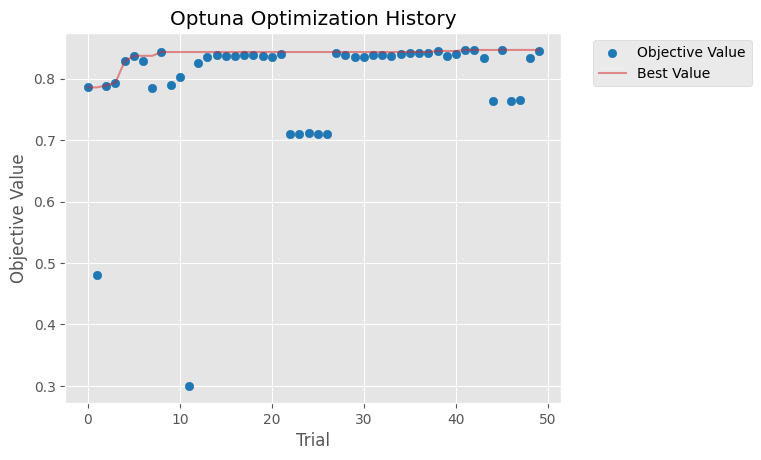

/tmp/ipykernel_1155/192914180.py:52: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study1)


<Figure size 800x600 with 0 Axes>

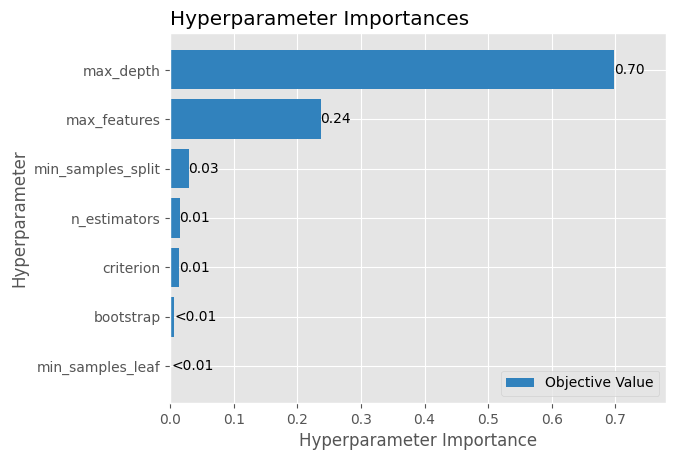

In [24]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
from joblib import parallel_backend
import numpy as np
import logging


def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 1200, step=100),  # More trees for better performance
        "max_depth": trial.suggest_int("max_depth", 3, 50),  # Shallow trees avoid overfitting, deeper trees capture complexity
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),  # Regularization to prevent overfitting
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),  # Smaller leaf size = more flexible tree
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),  # Feature selection
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),  # Whether to use bootstrapping
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"]),  # Splitting criteria
    }

    model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    
    scorer = make_scorer(f1_score, average="weighted")
    scores = cross_val_score(model, train_data_scaled, train_labels, scoring=scorer, cv=skf, n_jobs=5)
    score = np.mean(scores)
    logging.info(f"Trial {trial.number} finished with value: {score:.5f} and parameters: {trial.params}")

    return score


study1 = optuna.create_study( study_name= "rf_rn_2",storage="sqlite:///rf_rn_2.db",direction="maximize", pruner=optuna.pruners.MedianPruner())
study1.optimize(objective, n_trials=50,n_jobs=5)

df = study1.trials_dataframe()
df.to_csv("rf_rn_2.csv", index=False)
logging.info("Optuna study completed. Results saved to optuna_results.csv.")

best_params = study1.best_params
logging.info(f"Best parameters: {best_params}")
print("Best parameters for classifier:", study1.best_params)
print("Best F1-score for classifier:", study1.best_value)

plt.figure(figsize=(8, 6))
optuna.visualization.matplotlib.plot_optimization_history(study1)
plt.title("Optuna Optimization History")
plt.savefig("op_rf_rn_2_5.png")
plt.show()

plt.figure(figsize=(8, 6))
optuna.visualization.matplotlib.plot_param_importances(study1)
#plt.title("Hyperparameter Importance")
plt.savefig("pi_rf_rn_2.png")
plt.show()

logging.info("Plots saved: optimization_history.png and param_importance.png")


[I 2025-03-29 20:10:18,011] A new study created in RDB with name: knn_rn_2
[I 2025-03-29 20:10:25,260] Trial 4 finished with value: 0.6567838694883391 and parameters: {'metric': 'cosine', 'n_neighbors': 34, 'weights': 'distance', 'leaf_size': 40}. Best is trial 4 with value: 0.6567838694883391.
/opt/conda/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[I 2025-03-29 20:10:26,312] Trial 7 finished with value: 0.8108054194466827 and parameters: {'metric': 'manhattan', 'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance', 'leaf_size': 40, 'p': 1}. Best is trial 7 with value: 0.8108054194466827.
[I 2025-03-29 20:10:26,528] Trial 6 finished with value: 0.7010499861019044 and parameters: {'metric': 'euclidean', 'algorithm': 'brute', 'n_neighbors': 4, 'weights': 'uniform', 'leaf_size': 30, 'p': 1}. 

Best parameters for RF: {'metric': 'manhattan', 'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance', 'leaf_size': 40, 'p': 1}
Best F1-score for RF: 0.8108054194466827


/tmp/ipykernel_1155/4291689076.py:54: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


<Figure size 800x600 with 0 Axes>

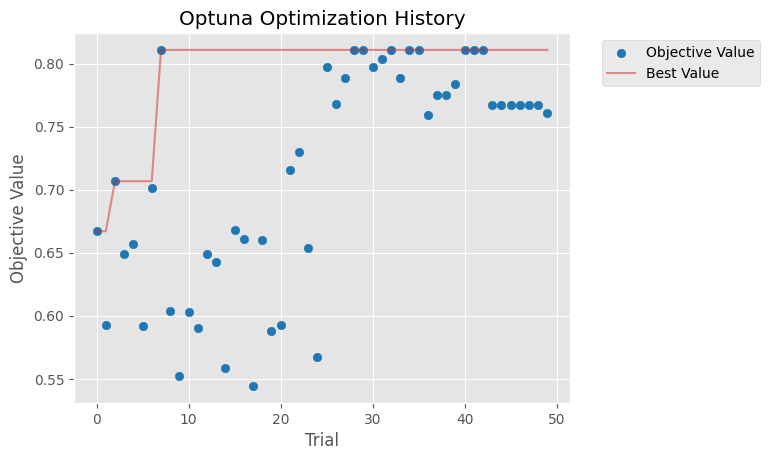

/tmp/ipykernel_1155/4291689076.py:60: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


<Figure size 800x600 with 0 Axes>

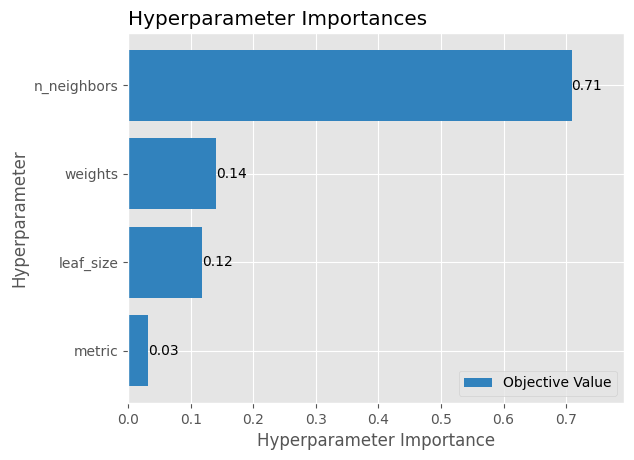

In [28]:
import optuna
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
from joblib import parallel_backend
import numpy as np
import logging

def objective(trial):
    metric = trial.suggest_categorical("metric", ["euclidean", "manhattan", "cosine"])

    # Ensure `cosine` distance is only used with `brute` algorithm
    if metric == "cosine":
        algorithm = "brute"
    else:
        algorithm = trial.suggest_categorical("algorithm", ["auto", "ball_tree", "kd_tree", "brute"])

    params = {
        "n_neighbors": trial.suggest_int("n_neighbors", 3, 50),  # Number of neighbors
        "weights": trial.suggest_categorical("weights", ["uniform", "distance"]),  # Weighting scheme
        "algorithm": algorithm,  # Adjusted algorithm choice
        "leaf_size": trial.suggest_int("leaf_size", 10, 100, step=10),  # Only used for tree-based methods
        "p": trial.suggest_int("p", 1, 2) if metric in ["euclidean", "manhattan"] else 2,  # p is only relevant for Euclidean/Manhattan
        "metric": metric,  # Distance metric
    }


    model = KNeighborsClassifier(**params, n_jobs=-1)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    
    scorer = make_scorer(f1_score, average="weighted")
    scores = cross_val_score(model, train_data_scaled, train_labels, scoring=scorer, cv=skf, n_jobs=4)
    score = np.mean(scores)
    logging.info(f"Trial {trial.number} finished with value: {score:.5f} and parameters: {trial.params}")

    return score


study = optuna.create_study( study_name= "knn_rn_2",storage="sqlite:///knn_rn_2.db",direction="maximize", pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=50, n_jobs=16)

df = study.trials_dataframe()
df.to_csv("op_knn_rn_2.csv", index=False)
logging.info("Optuna study completed. Results saved to optuna_results.csv.")

best_params = study.best_params
logging.info(f"Best parameters: {best_params}")
print("Best parameters for RF:", study.best_params)
print("Best F1-score for RF:", study.best_value)

plt.figure(figsize=(8, 6))
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.title("Optuna Optimization History")
plt.savefig("oh_knn_rn_2.png")
plt.show()

plt.figure(figsize=(8, 6))
optuna.visualization.matplotlib.plot_param_importances(study)
#plt.title("Hyperparameter Importance")
plt.savefig("pi_knn_rn_2.png")
plt.show()

logging.info("Plots saved: optimization_history.png and param_importance.png")


In [25]:
import os
os.cpu_count()


128

[I 2025-03-29 20:27:14,192] A new study created in RDB with name: mlp_rn_2
INFO:optuna.storages._rdb.storage:A new study created in RDB with name: mlp_rn_2
/tmp/ipykernel_1155/2515044974.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform('learning_rate_init', 1e-5, 1e-2)
/tmp/ipykernel_1155/2515044974.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-6, 1e-2)
/tmp/ipykernel_1155/2515044974.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(.

Best parameters for RF: {'hidden_layer_1': 332, 'hidden_layer_2': 130, 'hidden_layer_3': 111, 'solver': 'adam', 'learning_rate_init': 0.0011935962091049461, 'alpha': 9.880852955939257e-05, 'batch_size': 64, 'activation': 'tanh', 'max_iter': 590}
Best F1-score for RF: 0.809301301756852


<Figure size 800x600 with 0 Axes>

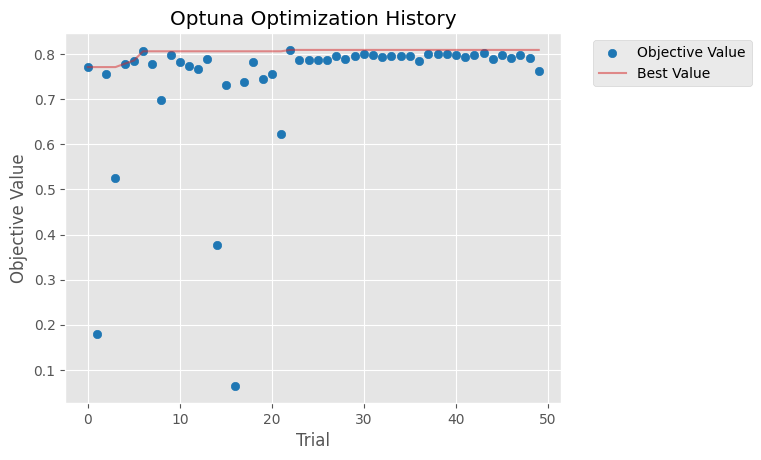

/tmp/ipykernel_1155/2515044974.py:63: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


<Figure size 800x600 with 0 Axes>

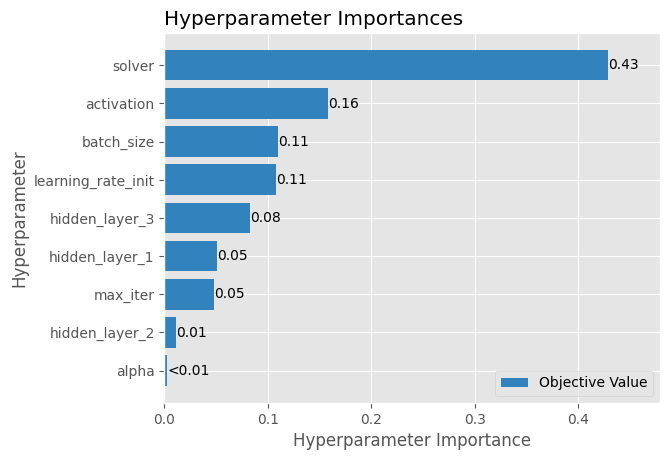

In [29]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.datasets import make_classification
import optuna

optuna.logging.enable_propagation()
optuna.logging.set_verbosity(optuna.logging.INFO)

def objective(trial):
    hidden_layer_1 = trial.suggest_int('hidden_layer_1', 128, 512)
    hidden_layer_2 = trial.suggest_int('hidden_layer_2', 64, 256)
    hidden_layer_3 = trial.suggest_int('hidden_layer_3', 32, 128)
    solver = trial.suggest_categorical('solver', ['adam', 'sgd', 'lbfgs'])
    learning_rate_init = trial.suggest_loguniform('learning_rate_init', 1e-5, 1e-2)
    alpha = trial.suggest_loguniform('alpha', 1e-6, 1e-2) 
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128, 256])
    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'logistic'])
    max_iter = trial.suggest_int('max_iter', 200, 1000)

    model = MLPClassifier(
            hidden_layer_sizes=(hidden_layer_1, hidden_layer_2, hidden_layer_3),
            max_iter=max_iter,
            solver=solver,
            learning_rate="adaptive",
            learning_rate_init=learning_rate_init,
            early_stopping=True,
            alpha=alpha,
            batch_size=batch_size,
            activation=activation,
            random_state=42
        )

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    
    scorer = make_scorer(f1_score, average="weighted")
    scores = cross_val_score(model, train_data_scaled, train_labels, scoring=scorer, cv=skf, n_jobs=4)
    score = np.mean(scores)
    logging.info(f"Trial {trial.number} finished with value: {score:.5f} and parameters: {trial.params}")

    return score


study = optuna.create_study( study_name= "mlp_rn_2",storage="sqlite:///mlp_rn_2.db",direction="maximize", pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=50, n_jobs=16)

df = study.trials_dataframe()
df.to_csv("ormlp_rn_2.csv", index=False)
logging.info("Optuna study completed. Results saved to optuna_results.csv.")

best_params = study.best_params
logging.info(f"Best parameters: {best_params}")
print("Best parameters for RF:", study.best_params)
print("Best F1-score for RF:", study.best_value)

plt.figure(figsize=(8, 6))
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.title("Optuna Optimization History")
plt.savefig("oh_mlp_rn_2.png")
plt.show()

plt.figure(figsize=(8, 6))
optuna.visualization.matplotlib.plot_param_importances(study)
#plt.title("Hyperparameter Importance")
plt.savefig("pi_mlp_rn_2.png")
plt.show()

logging.info("Plots saved: optimization_history.png and param_importance.png")


In [ ]:
here

In [ ]:
import optuna
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
from joblib import parallel_backend
import numpy as np
import logging
import xgboost as xgb


def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 1200, step=100),  
        "max_depth": trial.suggest_int("max_depth", 3, 50),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 0.9),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-2, 10, log=True),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-2, 10, log=True),
        "objective": "multi:softmax",  
        "eval_metric": "mlogloss",
        "tree_method": "hist",  
    }

    model = xgb.XGBClassifier(**params, random_state=42, n_jobs=-1)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    
    scorer = make_scorer(f1_score, average="weighted")
    scores = cross_val_score(model, train_data_scaled, train_labels, scoring=scorer, cv=skf, n_jobs=4)
    score = np.mean(scores)
    logging.info(f"Trial {trial.number} finished with value: {score:.5f} and parameters: {trial.params}")

    return score


study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner(), study_name= "xg_rn_2",storage="sqlite:///xg_rn_2.db")
study.optimize(objective, n_trials=50, n_jobs=16)

df = study.trials_dataframe()
df.to_csv("or_xg_rn_2.csv", index=False)
logging.info("Optuna study completed. Results saved to optuna_results.csv.")

best_params = study.best_params
logging.info(f"Best parameters: {best_params}")
print("Best parameters for classifier:", study.best_params)
print("Best F1-score for classifier:", study.best_value)

plt.figure(figsize=(8, 6))
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.title("Optuna Optimization History")
plt.savefig("op_xg_rn_2.png")
plt.show()

plt.figure(figsize=(8, 6))
optuna.visualization.matplotlib.plot_param_importances(study)
plt.savefig("pi_xg_rn_2.png")
plt.show()

logging.info("Plots saved: optimization_history.png and param_importance.png")


[I 2025-03-29 21:09:20,488] A new study created in RDB with name: xg_rn_2
INFO:optuna.storages._rdb.storage:A new study created in RDB with name: xg_rn_2
/opt/conda/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[I 2025-03-29 21:40:37,444] Trial 2 finished with value: 0.8516290239475557 and parameters: {'n_estimators': 700, 'max_depth': 4, 'learning_rate': 0.10280580356299042, 'subsample': 0.6686128323785583, 'colsample_bytree': 0.7735153721892418, 'gamma': 1.6690810935210165, 'reg_lambda': 0.15277768375383108, 'reg_alpha': 0.045010693883883}. Best is trial 2 with value: 0.8516290239475557.
INFO:optuna.study.study:Trial 2 finished with value: 0.8516290239475557 and parameters: {'n_estimators': 700, 'max_depth': 4, 'learning_rate': 0.10280580356299042, 'subsample': 0.6686128323785583, 'colsample_bytr

In [3]:
import optuna
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
from joblib import parallel_backend
import numpy as np
import logging
import xgboost as xgb


def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 1200, step=100),  
        "max_depth": trial.suggest_int("max_depth", 3, 50),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 0.9),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-2, 10, log=True),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-2, 10, log=True),
        "objective": "multi:softmax",  
        "eval_metric": "mlogloss",
        "tree_method": "hist",  
    }

    model = xgb.XGBClassifier(**params, random_state=42, n_jobs=-1)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    
    scorer = make_scorer(f1_score, average="weighted")
    scores = cross_val_score(model, train_data_scaled, train_labels, scoring=scorer, cv=skf, n_jobs=4)
    score = np.mean(scores)
    logging.info(f"Trial {trial.number} finished with value: {score:.5f} and parameters: {trial.params}")

    return score


study = optuna.load_study(study_name= "xg_rn_2",storage="sqlite:///xg_rn_2.db")
study.optimize(objective, n_trials=46, n_jobs=16)

df = study.trials_dataframe()
df.to_csv("or_xg_rn_2.csv", index=False)
logging.info("Optuna study completed. Results saved to optuna_results.csv.")

best_params = study.best_params
logging.info(f"Best parameters: {best_params}")
print("Best parameters for classifier:", study.best_params)
print("Best F1-score for classifier:", study.best_value)

plt.figure(figsize=(8, 6))
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.title("Optuna Optimization History")
plt.savefig("op_xg_rn_2.png")
plt.show()

plt.figure(figsize=(8, 6))
optuna.visualization.matplotlib.plot_param_importances(study)
plt.savefig("pi_xg_rn_2.png")
plt.show()

logging.info("Plots saved: optimization_history.png and param_importance.png")


/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-03-29 23:16:32,739] Trial 31 finished with value: 0.7990672182401546 and parameters: {'n_estimators': 200, 'max_depth': 19, 'learning_rate': 0.1445864274328829, 'subsample': 0.548707839016433, 'colsample_bytree': 0.8213549305637355, 'gamma': 4.398517135777497, 'reg_lambda': 0.013848260740011937, 'reg_alpha': 0.2138204903874017}. Best is trial 5 with value: 0.8518842375572472.
[I 2025-03-29 23:53:02,268] Trial 26 finished with value: 0.8532370896490663 and parameters: {'n_estimators': 800, 'max_depth': 22, 'learning_rate': 0.031164141183584047, 'subsample': 0.9576223239824952, 'colsample_bytree': 0.8229247084339137, 'gamma': 0.924567046349204, 'reg_lambda': 0.061044337569925874, 'reg_alpha': 0.010122153814333092}. Best is trial 26 with va

KeyboardInterrupt: 

Best parameters for classifier: {'n_estimators': 700, 'max_depth': 6, 'learning_rate': 0.06880464674379164, 'subsample': 0.5717805315996993, 'colsample_bytree': 0.72163837917479, 'gamma': 0.739211143509742, 'reg_lambda': 0.31918802481802655, 'reg_alpha': 0.5515715243593446}
Best F1-score for classifier: 0.8620357248316658


/tmp/ipykernel_27496/4294018703.py:51: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


<Figure size 800x600 with 0 Axes>

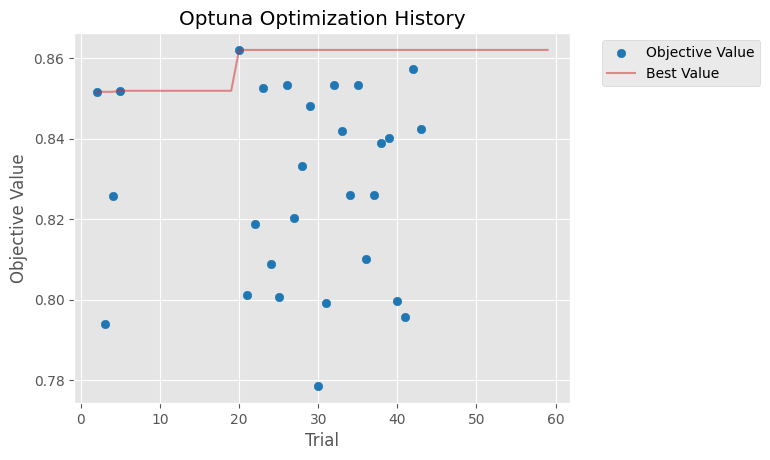

/tmp/ipykernel_27496/4294018703.py:57: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


<Figure size 800x600 with 0 Axes>

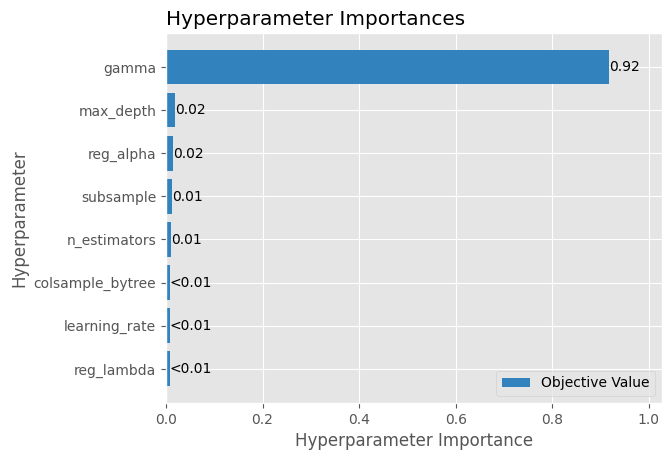

In [4]:
import optuna
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
from joblib import parallel_backend
import numpy as np
import logging
import xgboost as xgb


def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 1200, step=100),  
        "max_depth": trial.suggest_int("max_depth", 3, 50),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 0.9),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-2, 10, log=True),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-2, 10, log=True),
        "objective": "multi:softmax",  
        "eval_metric": "mlogloss",
        "tree_method": "hist",  
    }

    model = xgb.XGBClassifier(**params, random_state=42, n_jobs=-1)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    
    scorer = make_scorer(f1_score, average="weighted")
    scores = cross_val_score(model, train_data_scaled, train_labels, scoring=scorer, cv=skf, n_jobs=4)
    score = np.mean(scores)
    logging.info(f"Trial {trial.number} finished with value: {score:.5f} and parameters: {trial.params}")

    return score


study = optuna.load_study(study_name= "xg_rn_2",storage="sqlite:///xg_rn_2.db")
study.optimize(objective, n_trials=46, n_jobs=16)

df = study.trials_dataframe()
df.to_csv("or_xg_rn_2.csv", index=False)
logging.info("Optuna study completed. Results saved to optuna_results.csv.")

best_params = study.best_params
logging.info(f"Best parameters: {best_params}")
print("Best parameters for classifier:", study.best_params)
print("Best F1-score for classifier:", study.best_value)

plt.figure(figsize=(8, 6))
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.title("Optuna Optimization History")
plt.savefig("op_xg_rn_2.png")
plt.show()

plt.figure(figsize=(8, 6))
optuna.visualization.matplotlib.plot_param_importances(study)
plt.savefig("pi_xg_rn_2.png")
plt.show()

logging.info("Plots saved: optimization_history.png and param_importance.png")
